In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import Levenshtein

In [2]:
# define the name of headers
col_name = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
# read data from csv file
data = pd.read_csv('dataset1_dirty.csv',header=None,names = col_name)

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State gov,77516,Bachelors,13,Never-married,dmclrical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# better way to print
print("rows: {}".format(len(data.index)))
i = 0
while i < len(data.columns):
    if(type(data.loc[0][i]) == np.int64):
        print("{n}: min:{min}, mean:{mean}, max:{max}, std:{std}".format(n=data.columns[i],min=np.min(data.iloc[:,i]),mean=np.mean(data.iloc[:,i]),max=np.max(data.iloc[:,i]),std=np.std(data.iloc[:,i])))

    else:
        print("{n} : {count}".format(n=data.columns[i],count=data.iloc[:,i].nunique()))
        # refer to https://stackoverflow.com/questions/34178751/extract-unique-values-and-number-of-occurrences-of-each-value-from-dataframe-col
        uni_list = Counter(data.iloc[:,i])
        for uni in uni_list:
            print("  {}: {}".format(uni,uni_list[uni]))
        
    i = i+1

rows: 30162
age: min:-76, mean:36.49393276307937, max:90, std:17.390693604530956
workclass : 77
  State gov: 85
  Self-emp-not-inc: 1331
  Private: 19734
  private: 2099
  Federal-gov: 697
  Local-gov: 1534
  stategov: 12
  ?: 614
  federalgov: 13
  State-gov: 957
  Self-emp-inc: 692
  Self-emp inc: 60
  Self emp-not-inc: 110
  local-gov: 193
  Selfemp-not-inc: 129
  state-gov: 112
  local gov: 15
  Self-empinc: 74
  Self emp-inc: 61
  Self-emp-not inc: 109
  Self-emp-notinc: 134
  Self-emp not-inc: 105
  Localgov: 136
  Federalgov: 72
  self-empinc: 14
  Selfemp-nc: 2
  self-emp not-inc: 12
  self-emp-inc: 67
  Self emp-notinc: 10
  self-emp-not-inc: 151
  self emp-inc: 3
  Self-empnot-nc: 12
  self-emp inc: 9
  Self-empnot- nc: 11
  Self-emp not inc: 12
  Local gov: 122
  Stategov: 83
  Self-empnot-inc: 133
  Selfemp-not- nc: 21
  self empinc: 1
  Self emp inc: 5
  Federal gov: 65
  Selfemp- ot-inc: 10
  Self emp-not inc: 7
  federal-gov: 71
  Selfemp-not-nc: 14
  self-empnot-inc: 18

In [4]:
# delete the row with the value ?
data_clean1 = data[data['workclass'] != '?']
data_clean2 = data_clean1[data_clean1['occupation'] != '?']
data_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28958 entries, 0 to 30161
Data columns (total 15 columns):
age               28958 non-null int64
workclass         28958 non-null object
fnlwgt            28958 non-null int64
education         28958 non-null object
education-num     28958 non-null int64
marital-status    28958 non-null object
occupation        28958 non-null object
relationship      28958 non-null object
race              28958 non-null object
sex               28958 non-null object
capital-gain      28958 non-null int64
capital-loss      28958 non-null int64
hours-per-week    28958 non-null int64
native-country    28958 non-null object
salary            28958 non-null object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


In [5]:
"""     the column age has bad data
        change the value which less than 0 to the mean value of the dataset
"""
data_clean2['age'].values[data_clean2['age'].values <=0] = np.mean(data_clean2['age'])
data_clean2['age'].value_counts()  

36    1647
31     793
34     792
35     786
33     783
37     772
30     765
23     758
28     746
38     745
25     739
27     733
29     731
39     724
40     724
32     721
41     717
24     705
42     702
43     696
26     687
46     667
44     662
45     656
47     632
22     626
21     583
20     577
19     553
51     533
      ... 
17     304
60     256
61     240
62     200
63     176
64     162
65     129
67     102
66      98
68      84
69      73
70      58
71      46
73      43
72      37
74      37
90      34
75      31
76      27
77      20
80      15
79      15
78      13
81      12
84       8
82       6
83       5
85       3
88       2
86       1
Name: age, Length: 72, dtype: int64

In [6]:
workclass = "Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked ".split(', ')
print(workclass)

['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked ']


In [7]:
#clean the bad data for column workclass
#use the previous unique values to match the right one
work_list = data_clean2['workclass'].unique().tolist()
#print(len(work_list))
i=0
work_dict = {}
#print(len(work_list))
while i < len(work_list) :
    j = 0
    s = workclass[j]
    k = 0
    while j < len(workclass)-1:
   
        #print(Levenshtein.ratio(s,str))
        #print(Levenshtein.ratio(workclass[j+1],str))
        #print('++++')
        #print(list[i])
        if Levenshtein.ratio(workclass[j+1],work_list[i])>Levenshtein.ratio(s,work_list[i]):
            s =  workclass[j+1]
            #print(s)
            #print('------------')
            #print(s)
        j = j+1
   
    #print(list[i])
    #print(s)
    work_dict[work_list[i]] = s
    #print(i)
    i = i+1

work_dict

{'State gov': 'State-gov',
 'Self-emp-not-inc': 'Self-emp-not-inc',
 'Private': 'Private',
 'private': 'Private',
 'Federal-gov': 'Federal-gov',
 'Local-gov': 'Local-gov',
 'stategov': 'State-gov',
 'federalgov': 'Federal-gov',
 'State-gov': 'State-gov',
 'Self-emp-inc': 'Self-emp-inc',
 'Self-emp inc': 'Self-emp-inc',
 'Self emp-not-inc': 'Self-emp-not-inc',
 'local-gov': 'Local-gov',
 'Selfemp-not-inc': 'Self-emp-not-inc',
 'state-gov': 'State-gov',
 'local gov': 'Local-gov',
 'Self-empinc': 'Self-emp-inc',
 'Self emp-inc': 'Self-emp-inc',
 'Self-emp-not inc': 'Self-emp-not-inc',
 'Self-emp-notinc': 'Self-emp-not-inc',
 'Self-emp not-inc': 'Self-emp-not-inc',
 'Localgov': 'Local-gov',
 'Federalgov': 'Federal-gov',
 'self-empinc': 'Self-emp-inc',
 'Selfemp-nc': 'Self-emp-inc',
 'self-emp not-inc': 'Self-emp-not-inc',
 'self-emp-inc': 'Self-emp-inc',
 'Self emp-notinc': 'Self-emp-not-inc',
 'self-emp-not-inc': 'Self-emp-not-inc',
 'self emp-inc': 'Self-emp-inc',
 'Self-empnot-nc': 'Sel

In [8]:
def match(x,dict):
    return dict[x]
data_clean2['workclass']=data_clean2['workclass'].apply(lambda x: match(x,work_dict))

C:\Users\lanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
data_clean2['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [10]:
#clean bad data for column occupation
occupationclass ="Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces".split()
occupationlist = data_clean2['occupation'].unique().tolist()
print(len(occupationlist))
i=0
occupation_dict = {}
#print(len(list))
while i < len(occupationlist) :
    j = 0
    s = occupationclass[j]
    k = 0
    while j < len(occupationclass)-1:
   
        #print(Levenshtein.ratio(s,str))
        #print(Levenshtein.ratio(workclass[j+1],str))
        #print('++++')
        #print(list[i])
        if Levenshtein.ratio(occupationclass[j+1],occupationlist[i])>Levenshtein.ratio(s,occupationlist[i]):
            s =  occupationclass[j+1]
            #print(s)
            #print('------------')
            #print(s)
        j = j+1
   
    #print(list[i])
    #print(s)
    occupation_dict[occupationlist[i]] = s
    #print(i)
    i = i+1

print(len(occupation_dict))
data_clean2['occupation']=data_clean2['occupation'].apply(lambda x: match(x,occupation_dict))

472
472


C:\Users\lanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
data_clean2['occupation'].unique()

array(['Adm-clerical,', 'Exec-managerial,', 'Handlers-cleaners,',
       'Prof-specialty,', 'Other-service,', 'Sales,', 'Transport-moving,',
       'Farming-fishing,', 'Machine-op-inspct,', 'Tech-support,',
       'Craft-repair,', 'Protective-serv,', 'Armed-Forces',
       'Priv-house-serv,'], dtype=object)

In [12]:
data_clean2.to_csv('dataset1_processed.csv',index=False,header=False)

Text(0.5, 1.0, 'Age Histogram')

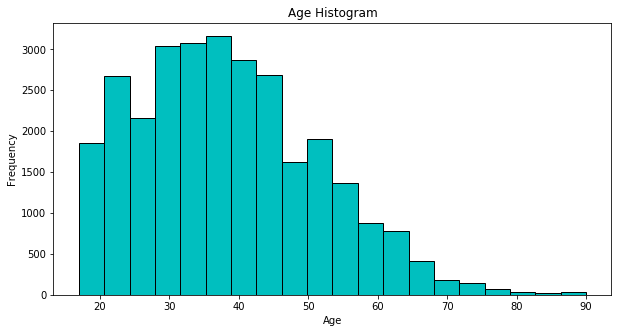

In [25]:
# plot histogram for column age
# refer to https://matplotlib.org/gallery/statistics/histogram_features.html
fig, ax = plt.subplots(figsize=(10,5))
N, bins, patches =ax.hist(data_clean2['age'],20,color='c',histtype='bar',ec='black')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title("Age Histogram")


In [30]:
data_clean2.groupby('workclass').count()['age']
    


workclass
Federal-gov           906
Local-gov            1983
Private             21396
Self-emp-inc         1034
Self-emp-not-inc     2404
State-gov            1222
Without-pay            13
Name: age, dtype: int64

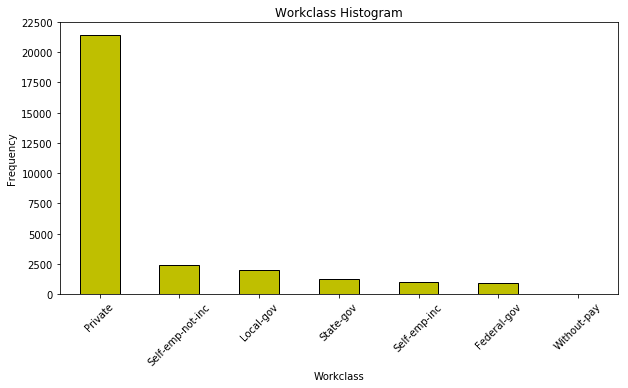

In [48]:
# plot histogram for column workclass
fig, ax = plt.subplots(figsize=(10,5))
data_clean2['workclass'].value_counts().plot.bar(color='y',ec='black')
ax.set_xlabel('Workclass')
ax.set_ylabel('Frequency')
ax.set_title("Workclass Histogram")
# refer to https://stackoverflow.com/questions/11264521/date-ticks-and-rotation-in-matplotlib
ax.xaxis.set_tick_params(rotation=45)

